In [20]:
import pandas as pd
import pip._vendor.requests as requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def mengo_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find(name='table', attrs={'id':'stats_standard_24'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year

        final_df = final_df._append(df)
    return final_df
url = 'https://fbref.com/en/squads/639950ae/{}/Flamengo-Stats.html'

df = mengo_stats(url,2018,2023)
df = df[df[('Unnamed: 0_level_0', 'Player')] != 'Squad Total']
df = df[df[('Unnamed: 0_level_0', 'Player')] != 'Opponent Total']
df = df.dropna(subset=[('Playing Time', 'Min')], how='any')
df.head()

Extraindo ano 2018


/var/folders/nj/r12790cx6q7gy6494mtdm1980000gn/T/ipykernel_2645/4019490834.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Extraindo ano 2019


/var/folders/nj/r12790cx6q7gy6494mtdm1980000gn/T/ipykernel_2645/4019490834.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Extraindo ano 2020


/var/folders/nj/r12790cx6q7gy6494mtdm1980000gn/T/ipykernel_2645/4019490834.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Extraindo ano 2021


/var/folders/nj/r12790cx6q7gy6494mtdm1980000gn/T/ipykernel_2645/4019490834.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Extraindo ano 2022


/var/folders/nj/r12790cx6q7gy6494mtdm1980000gn/T/ipykernel_2645/4019490834.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Extraindo ano 2023


/var/folders/nj/r12790cx6q7gy6494mtdm1980000gn/T/ipykernel_2645/4019490834.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player             Nation                Pos                Age   
0    Everton Ribeiro             br BRA                 MF               28.0   
1               Renê             br BRA                 DF               25.0   
2         Léo Duarte             br BRA                 DF               21.0   
3      Lucas Paquetá             br BRA                 MF               20.0   
4    Gustavo Cuellar             co COL                 MF               25.0   

  Unnamed: 4_level_0 Playing Time               Performance       ...  \
                  MP       Starts     Min   90s         Gls  Ast  ...   
0                 35           34  2813.0  31.3         7.0  5.0  ...   
1                 34           33  2977.0  33.1         2.0  5.0  ...   
2                 33           33  2938.0  32.6         1.0  0.0  ...   
3                 32           31  2743.0  30.5        10.0  1.0  ...   
4                 28           27  2309.0  25.7         0.0  2.0  ...   

  Expected Progression           Per 90 Minutes                           \
  npxG+xAG        PrgC PrgP PrgR             xG xAG xG+xAG npxG npxG+xAG   
0      NaN         NaN  NaN  NaN            NaN NaN    NaN  NaN      NaN   
1      NaN         NaN  NaN  NaN            NaN NaN    NaN  NaN      NaN   
2      NaN         NaN  NaN  NaN            NaN NaN    NaN  NaN      NaN   
3      NaN         NaN  NaN  NaN            NaN NaN    NaN  NaN      NaN   
4      NaN         NaN  NaN  NaN            NaN NaN    NaN  NaN      NaN   

  Unnamed: 33_level_0  
              Matches  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 36 columns]

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 0 to 31
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (Unnamed: 0_level_0, Player)    224 non-null    object 
 1   (Unnamed: 1_level_0, Nation)    224 non-null    object 
 2   (Unnamed: 2_level_0, Pos)       224 non-null    object 
 3   (Unnamed: 3_level_0, Age)       224 non-null    object 
 4   (Unnamed: 4_level_0, MP)        224 non-null    int64  
 5   (Playing Time, Starts)          224 non-null    int64  
 6   (Playing Time, Min)             224 non-null    float64
 7   (Playing Time, 90s)             224 non-null    float64
 8   (Performance, Gls)              224 non-null    float64
 9   (Performance, Ast)              224 non-null    float64
 10  (Performance, G+A)              224 non-null    float64
 11  (Performance, G-PK)             224 non-null    float64
 12  (Performance, PK)               224 non-nu

In [25]:
df['Goals'] = df[('Performance', 'Gls')]
top_players = df.sort_values(by='Goals', ascending=False).head(5)


/var/folders/nj/r12790cx6q7gy6494mtdm1980000gn/T/ipykernel_2645/3896422142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goals', y=('Unnamed: 0_level_0', 'Player'), data=top_players, palette='viridis')


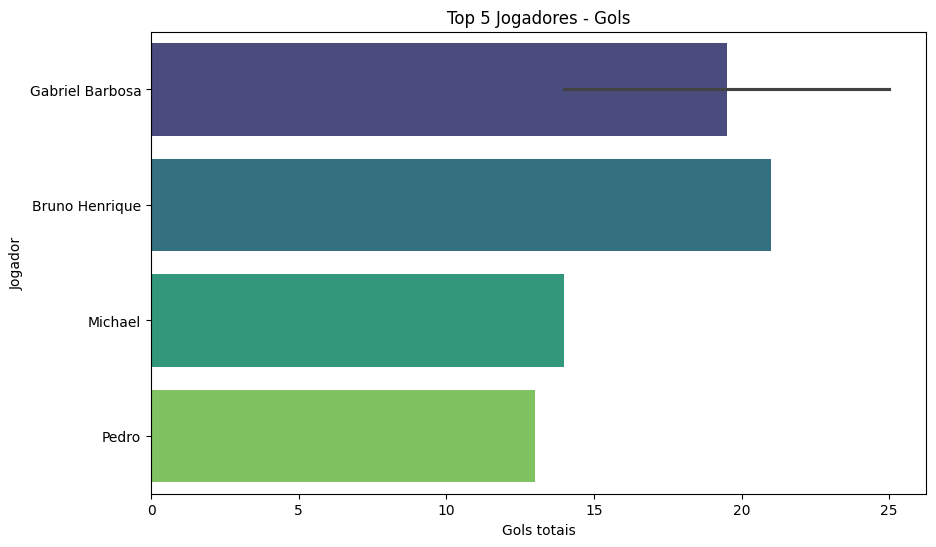

In [38]:
# Criando o gráfico usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Goals', y=('Unnamed: 0_level_0', 'Player'), data=top_players, palette='viridis')

# Configurações do gráfico
plt.xlabel('Gols totais')
plt.ylabel('Jogador')
plt.title('Top 5 Jogadores - Gols')
plt.show()

In [48]:
# Suponha que você tenha um DataFrame chamado df
# Crie novas colunas para 'Year', 'Player' e 'Gls'
df['Year'] = df[('Year', '')]
df['Player'] = df[('Unnamed: 0_level_0', 'Player')]
df['Gls'] = df[('Performance', 'Gls')]

In [49]:
# Filtrar o DataFrame para jogadores do tipo atacante (Pos = 'MF', 'FW', 'MF,FW' ou 'FW,MF')
df_ofensivos = df[df[('Unnamed: 2_level_0', 'Pos')].isin(['MF', 'FW', 'MF,FW', 'FW,MF'])]

# Agrupar por ano, jogador e calcular a soma de gols
gols_por_ano = df_ofensivos.groupby(['Year', 'Player'])['Gls'].sum().reset_index()

# Identificar os jogadores mais participativos em cada ano
jogadores_mais_participativos = gols_por_ano.loc[gols_por_ano.groupby('Year')['Gls'].idxmax()]


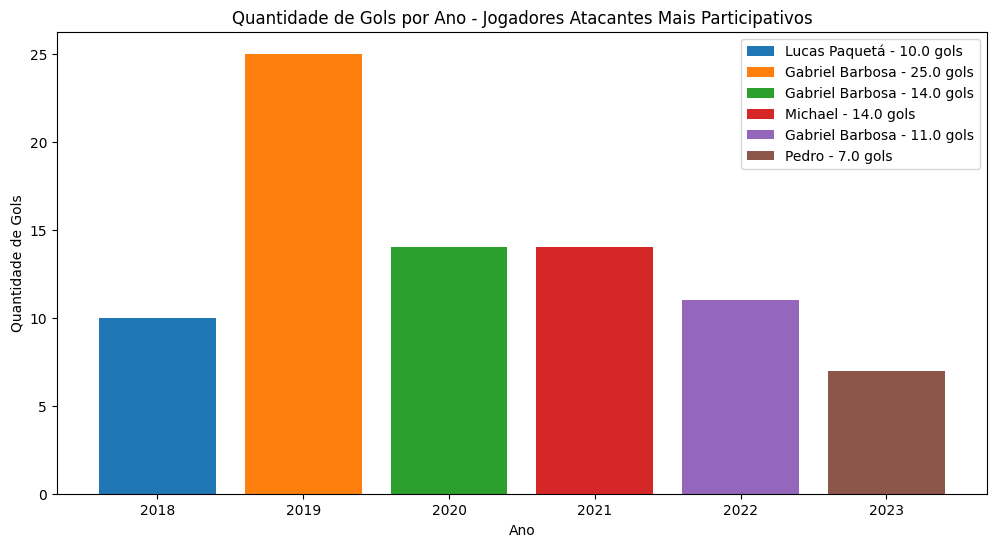

In [50]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
for jogador, data in jogadores_mais_participativos.iterrows():
    plt.bar(data['Year'], data['Gls'], label=f"{data['Player']} - {data['Gls']} gols")

plt.xlabel('Ano')
plt.ylabel('Quantidade de Gols')
plt.title('Quantidade de Gols por Ano - Jogadores Atacantes Mais Participativos')
plt.legend()
plt.show()

In [52]:
# Criar um novo DataFrame apenas com as colunas desejadas (Year, Player, Gls, Ast)
gols_assists = df_ofensivos.groupby(['Year', ('Unnamed: 0_level_0', 'Player')]).agg({
    ('Performance', 'Gls'): 'sum',
    ('Performance', 'Ast'): 'sum'
}).reset_index()

# Identificar os 4 jogadores mais ofensivos de cada ano
top_players = gols_assists.groupby('Year').apply(lambda x: x.nlargest(4, ('Performance', 'Gls'))).reset_index(drop=True)


In [55]:
# Filtrar os jogadores específicos de 2019 a 2023
jogadores_especificos = ['Gabriel Barbosa', 'Everton Ribeiro', 'Bruno Henrique', 'Giorgian De Arrascaeta']
dados_jogadores = gols_assists[gols_assists['Year'].between(2019, 2023) & gols_assists[('Unnamed: 0_level_0', 'Player')].isin(jogadores_especificos)]


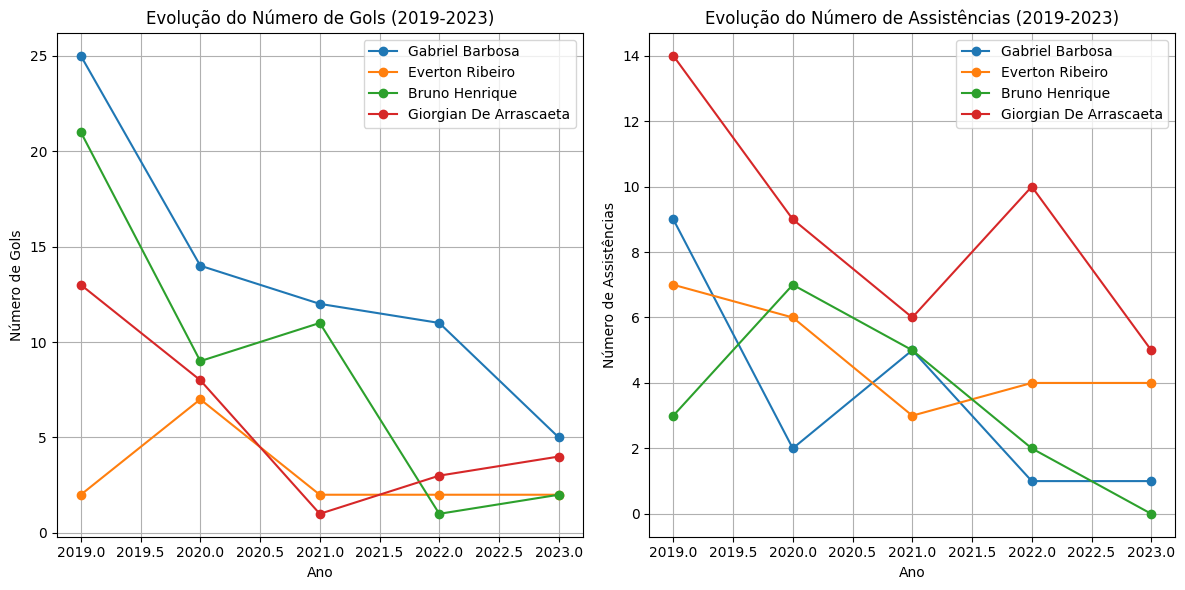

In [57]:
# Preparar gráficos de linha para a evolução de gols e assistências de cada jogador
plt.figure(figsize=(12, 6))

# Gráfico de gols
plt.subplot(1, 2, 1)
for jogador in jogadores_especificos:
    dados_jogador = dados_jogadores[dados_jogadores[('Unnamed: 0_level_0', 'Player')] == jogador]
    plt.plot(dados_jogador['Year'], dados_jogador[('Performance', 'Gls')], marker='o', label=jogador)

plt.xlabel('Ano')
plt.ylabel('Número de Gols')
plt.title('Evolução do Número de Gols (2019-2023)')
plt.legend()
plt.grid(True)

# Gráfico de assistências
plt.subplot(1, 2, 2)
for jogador in jogadores_especificos:
    dados_jogador = dados_jogadores[dados_jogadores[('Unnamed: 0_level_0', 'Player')] == jogador]
    plt.plot(dados_jogador['Year'], dados_jogador[('Performance', 'Ast')], marker='o', label=jogador)

plt.xlabel('Ano')
plt.ylabel('Número de Assistências')
plt.title('Evolução do Número de Assistências (2019-2023)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()